# Dependencies

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import timeit
import time
from torch.optim import Adam
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt, random

2022-03-09 18:52:13.188217: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-09 18:52:13.188235: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
all_times = []
le_times = []
g_times = []

pred_all_times = []
pred_le_times = []
pred_g_times = []

all_MAE = []
le_MAE = []
g_MAE = []

In [19]:
all_MSE = []
le_MSE = []
g_MSE = []

# Data

In [46]:
num_data = "100k"

In [47]:
df = pd.read_csv("train/{}.csv".format(num_data))
df.drop(["c/b", "F"], axis=1, inplace=True)
d = df.to_numpy()

d_le = np.load("train/{}_le1.npy".format(num_data))
d_g = np.load("train/{}_g1.npy".format(num_data))

d.shape, d_le.shape, d_g.shape

((97290, 4), (44390, 4), (52900, 4))

# NN Fitting

In [48]:
def NN(X_train, y_train):
    #create model
    model = Sequential()
    #get number of columns in training data
    n_cols = X_train.shape[1]
    #add model layers
    model.add(Dense(10, activation='tanh', input_shape=(n_cols,), kernel_initializer=tf.keras.initializers.HeUniform()))
    model.add(Dense(50, activation='tanh', kernel_initializer=tf.keras.initializers.HeUniform()))
    model.add(Dense(50, activation='tanh', kernel_initializer=tf.keras.initializers.HeUniform()))
    model.add(Dense(50, activation='tanh', kernel_initializer=tf.keras.initializers.HeUniform()))
    model.add(Dense(50, activation='tanh', kernel_initializer=tf.keras.initializers.HeUniform()))
    model.add(Dense(1, activation='relu', kernel_initializer=tf.keras.initializers.HeUniform()))
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')
    early_stopping_monitor = EarlyStopping(patience=10)
    history = model.fit(X_train, y_train, validation_split=0.2, epochs=1000, callbacks=[early_stopping_monitor])
    return history, model

In [49]:
t0 = time.time()
history, reg_all = NN(d[:,:3], d[:,3])
t1 = time.time()
print("NN train time: {} secs".format(t1-t0))

Epoch 1/1000
2433/2433 [==============================] - 3s 997us/step - loss: 0.0098 - val_loss: 6.6761e-04
Epoch 2/1000
2433/2433 [==============================] - 3s 1ms/step - loss: 7.2817e-04 - val_loss: 0.0012
Epoch 3/1000
2433/2433 [==============================] - 2s 956us/step - loss: 4.8124e-04 - val_loss: 4.6004e-04
Epoch 4/1000
2433/2433 [==============================] - 3s 1ms/step - loss: 3.4530e-04 - val_loss: 2.0351e-04
Epoch 5/1000
2433/2433 [==============================] - 2s 947us/step - loss: 3.5521e-04 - val_loss: 4.5605e-04
Epoch 6/1000
2433/2433 [==============================] - 2s 1ms/step - loss: 2.4054e-04 - val_loss: 8.9300e-04
Epoch 7/1000
2433/2433 [==============================] - 3s 1ms/step - loss: 1.9012e-04 - val_loss: 6.9415e-04
Epoch 8/1000
2433/2433 [==============================] - 2s 955us/step - loss: 1.9320e-04 - val_loss: 7.5376e-04
Epoch 9/1000
2433/2433 [==============================] - 2s 976us/step - loss: 2.0038e-04 - val_loss: 0

In [50]:
all_times.append(t1-t0)

In [51]:
t0 = time.time()
history, reg_le = NN(d_le[:,:3], d_le[:,3])
t1 = time.time()
print("NN train time: {} secs".format(t1-t0))

Epoch 1/1000
1110/1110 [==============================] - 1s 1ms/step - loss: 0.0158 - val_loss: 0.0022
Epoch 2/1000
1110/1110 [==============================] - 1s 1ms/step - loss: 0.0014 - val_loss: 0.0023
Epoch 3/1000
1110/1110 [==============================] - 1s 1ms/step - loss: 8.7357e-04 - val_loss: 0.0019
Epoch 4/1000
1110/1110 [==============================] - 1s 1ms/step - loss: 5.2391e-04 - val_loss: 7.2860e-04
Epoch 5/1000
1110/1110 [==============================] - 1s 1ms/step - loss: 3.8457e-04 - val_loss: 5.0290e-04
Epoch 6/1000
1110/1110 [==============================] - 1s 1ms/step - loss: 2.5835e-04 - val_loss: 1.8728e-04
Epoch 7/1000
1110/1110 [==============================] - 1s 1ms/step - loss: 2.9865e-04 - val_loss: 5.7687e-04
Epoch 8/1000
1110/1110 [==============================] - 1s 972us/step - loss: 2.4820e-04 - val_loss: 3.6713e-04
Epoch 9/1000
1110/1110 [==============================] - 1s 1ms/step - loss: 1.7859e-04 - val_loss: 0.0038
Epoch 10/1000


In [52]:
le_times.append(t1-t0)

In [53]:
t0 = time.time()
history, reg_g = NN(d_g[:,:3], d_g[:,3])
t1 = time.time()
print("NN train time: {} secs".format(t1-t0))

Epoch 1/1000
1323/1323 [==============================] - 2s 1ms/step - loss: 0.0036 - val_loss: 5.5237e-04
Epoch 2/1000
1323/1323 [==============================] - 1s 935us/step - loss: 4.1854e-04 - val_loss: 3.9326e-04
Epoch 3/1000
1323/1323 [==============================] - 1s 999us/step - loss: 3.1624e-04 - val_loss: 5.9790e-04
Epoch 4/1000
1323/1323 [==============================] - 1s 1ms/step - loss: 2.4228e-04 - val_loss: 2.4917e-04
Epoch 5/1000
1323/1323 [==============================] - 2s 1ms/step - loss: 1.5052e-04 - val_loss: 8.1403e-05
Epoch 6/1000
1323/1323 [==============================] - 1s 970us/step - loss: 8.5897e-05 - val_loss: 3.1665e-04
Epoch 7/1000
1323/1323 [==============================] - 1s 998us/step - loss: 8.3608e-05 - val_loss: 4.5261e-05
Epoch 8/1000
1323/1323 [==============================] - 1s 1ms/step - loss: 7.2068e-05 - val_loss: 1.8742e-04
Epoch 9/1000
1323/1323 [==============================] - 1s 1ms/step - loss: 9.9020e-05 - val_loss:

In [54]:
g_times.append(t1-t0)

# Results

In [55]:
df = pd.read_csv("test/2_RN_eqn_data_TEST.csv")
df.drop(["c/b", "F"], axis=1, inplace=True)
d = df.to_numpy()

d_le = np.load("test/le1.npy")
d_g = np.load("test/g1.npy")

d.shape, d_le.shape, d_g.shape

((13824, 4), (6336, 4), (7488, 4))

In [56]:
def error(reg, data):
    t0 = time.time()
    result = reg.predict(data[:,:-1])
    t1 = time.time()
    MAE = np.mean(np.abs(result-data[:,-1]))
    return MAE, t1-t0

mse, t = error(reg_all, d)
pred_all_times.append(t)
all_MAE.append(mse)
all_MSE.append(reg_all.evaluate(d[:,:-1],d[:,-1]))
print("MAE all: ", mse)
print("Prediction time: ", t)

mse, t = error(reg_le, d)
pred_le_times.append(t)
le_MAE.append(mse)
le_MSE.append(reg_le.evaluate(d_le[:,:-1],d_le[:,-1]))
print("MAE a/c<=1: ", mse)
print("Prediction time: ", t)

mse, t = error(reg_g, d)
pred_g_times.append(t)
g_MAE.append(mse)
g_MSE.append(reg_g.evaluate(d_g[:,:-1],d_g[:,-1]))
print("MAE a/c>1: ", mse)
print("Prediction time: ", t)

432/432 [==============================] - 0s 892us/step - loss: 1.7872e-04
MAE all:  0.3051965598738298
Prediction time:  0.25738048553466797
198/198 [==============================] - 0s 880us/step - loss: 6.6847e-05
MAE a/c<=1:  0.28417056348193415
Prediction time:  0.24448132514953613
234/234 [==============================] - 0s 896us/step - loss: 2.1520e-05
MAE a/c>1:  0.4196440252311813
Prediction time:  0.23816418647766113


In [57]:
reg_all.save("models/{}_NN_all.h5".format(num_data))
reg_le.save("models/{}_NN_le.h5".format(num_data))
reg_g.save("models/{}_NN_g.h5".format(num_data))

## Fitting Equation

In [82]:
def sort(data):
    models = []
    model = np.unique(data[:,[0,1,2]], axis=0)
    
    for i in model:
        models.append(data[np.where((data[:,[0,1,2]] == i).all(axis=1))])

    return models 

def compare(model):
    results_all = []
    results_sep = []
    
    result = np.zeros((len(model),1))
    model = np.delete(model, [2,4], 1)

    result[:,0] = np.squeeze(reg_all.predict(model[:,:-1]), axis=-1)
    results_all.append(result)

    # a/c separated
    result = np.zeros((len(model),1))
    if model[0,0] <= 1:
        result[:,0] = np.squeeze(reg_le.predict(model[:,:-1]), axis=-1)

    elif model[0,0] > 1:
        result[:,0] = np.squeeze(reg_g.predict(model[:,:-1]), axis=-1)

    else:
        print("Something wrong!")

    results_sep.append(result)
        
    return results_all, results_sep



def plot(model_num):
    results_all, results_sep = compare(models[model_num])
    plt.scatter(models[model_num][:,-3], models[model_num][:,-1], label="Ground Truth")
    plt.plot(models[model_num][:,-3], results_all[0][:,0], label="NN all", color='red')
    plt.plot(models[model_num][:,-3], results_sep[0][:,0], label="NN separated", color='green')
    plt.title("a/c={}; a/t={}; c/b={}".format(models[model_num][0,0],
                                             models[model_num][0,1],
                                             models[model_num][0,2]))
    plt.xlabel("phi")
    plt.ylabel("Mg")
    plt.legend()
    plt.show()
    return

In [83]:
# Loading test dataset
df = pd.read_csv("test/2_RN_eqn_data_TEST.csv")
d = df.to_numpy()
d.shape

(97290, 6)

In [84]:
models = sort(d)
len(models)

2115

In [85]:
interact(plot, model_num=(1,len(models)-1,1));

interactive(children=(IntSlider(value=1057, description='model_num', max=2114, min=1), Output()), _dom_classes…

In [62]:
# np.save("results/all_times.npy", all_times)
# np.save("results/le_times.npy", le_times)
# np.save("results/g_times.npy", g_times)

# np.save("results/pred_all_times.npy", pred_all_times)
# np.save("results/pred_le_times.npy", pred_le_times)
# np.save("results/pred_g_times.npy", pred_g_times)

# np.save("results/all_MAE.npy", all_MAE)
# np.save("results/le_MAE.npy", le_MAE)
# np.save("results/g_MAE.npy", g_MAE)

np.save("results/all_MSE.npy", all_MSE)
np.save("results/le_MSE.npy", le_MSE)
np.save("results/g_MSE.npy", g_MSE)

In [ ]:
pred_all_times = np.load("results/pred_all_times.npy")
pred_le_times = np.load("results/pred_le_times.npy")
pred_g_times = np.load("results/pred_g_times.npy")

Text(0.5, 1.0, 'NN Training Time')

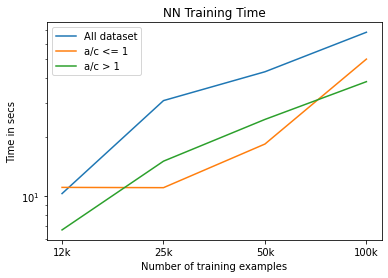

In [58]:
num_data = ["12k", "25k", "50k", "100k"]
plt.plot(num_data, all_times, label="All dataset")
plt.plot(num_data, le_times, label="a/c <= 1")
plt.plot(num_data, g_times, label="a/c > 1")
plt.legend()
plt.semilogy()
plt.xlabel("Number of training examples")
plt.ylabel("Time in secs")
plt.title("NN Training Time")

ValueError: x and y must have same first dimension, but have shapes (4,) and (5,)

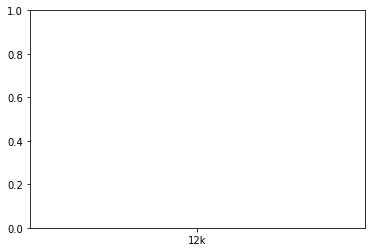

In [59]:
num_data = ["12k", "25k", "50k", "100k"]
plt.plot(num_data, pred_all_times, label="All dataset")
plt.plot(num_data, pred_le_times, label="a/c <= 1")
plt.plot(num_data, pred_g_times, label="a/c > 1")
plt.legend()
plt.xlabel("Number of training examples")
plt.ylabel("Time in secs")
plt.title("NN Testing Time")

ValueError: x and y must have same first dimension, but have shapes (4,) and (5,)

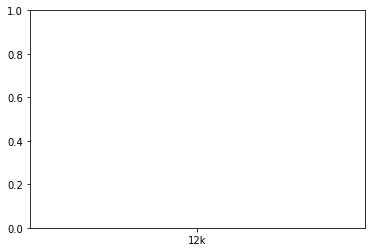

In [60]:
num_data = ["12k", "25k", "50k", "100k"]
plt.plot(num_data, all_MAE, label="All dataset")
plt.plot(num_data, le_MAE, label="a/c <= 1")
plt.plot(num_data, g_MAE, label="a/c > 1")
plt.legend()
plt.xlabel("Number of training examples")
plt.ylabel("MAE")
plt.title("NN Mean Absolute Error")

Text(0.5, 1.0, 'NN Mean Squared Error')

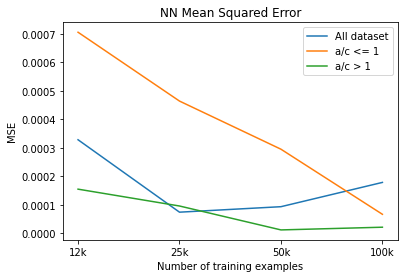

In [64]:
num_data = ["12k", "25k", "50k", "100k"]
plt.plot(num_data, all_MSE, label="All dataset")
plt.plot(num_data, le_MSE, label="a/c <= 1")
plt.plot(num_data, g_MSE, label="a/c > 1")
plt.legend()
plt.xlabel("Number of training examples")
plt.ylabel("MSE")
plt.title("NN Mean Squared Error")